<a href="https://colab.research.google.com/github/NonaHelmi/SC/blob/main/antcolony_VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Tour: [4, 3, 2, 1, 0, 4]
Best Distance: 11.772699034745349


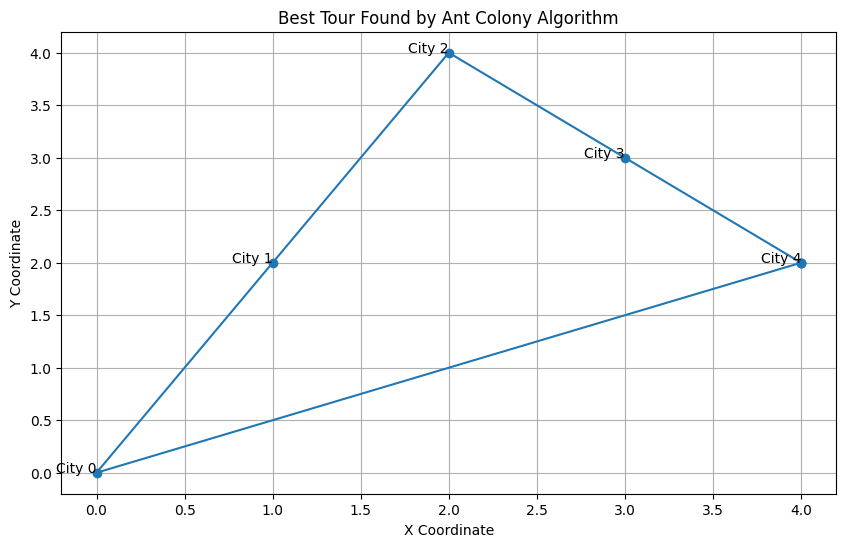

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Ant:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.tour = []  # The route taken by the ant
        self.total_distance = 0

    def visit_city(self, city, distance):
        self.tour.append(city)
        self.total_distance += distance

def initialize_pheromone(num_cities):
    return np.ones((num_cities, num_cities))  # Initial pheromone levels

def compute_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i][j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return distance_matrix

def ant_colony_vrp(coordinates, num_ants=10, num_iterations=100, alpha=1, beta=2, evaporation_rate=0.5):
    num_cities = len(coordinates)
    distance_matrix = compute_distance_matrix(coordinates)
    pheromone = initialize_pheromone(num_cities)

    best_tour = None
    best_distance = float('inf')

    for iteration in range(num_iterations):
        all_ants = []

        for ant in range(num_ants):
            current_city = random.randint(0, num_cities - 1)  # Randomly start from one of the cities
            unvisited = list(range(num_cities))
            unvisited.remove(current_city)

            tour = [current_city]
            total_distance = 0
           # print(f"Ant {ant + 1}, starting at city {current_city}")

            while unvisited:
                probabilities = []
                for city in unvisited:
                    pheromone_value = pheromone[current_city][city]
                    heuristic_value = 1 / (distance_matrix[current_city][city] ** beta)
                    probabilities.append((pheromone_value ** alpha) * heuristic_value)

                prob_sum = sum(probabilities)
                if prob_sum > 0:
                    normalized_prob = [p / prob_sum for p in probabilities]
                else:
                    normalized_prob = [1 / len(unvisited)] * len(unvisited)  # Uniform probability if all pheromones are zero

                # Select the next city
                next_city = np.random.choice(unvisited, p=normalized_prob)
                tour.append(next_city)
                total_distance += distance_matrix[current_city][next_city]
               # print(f"Ant {ant + 1} moved from city {current_city} to city {next_city}")

                current_city = next_city
                unvisited.remove(next_city)

            # Return to the starting city
            total_distance += distance_matrix[tour[-1]][tour[0]]
            tour.append(tour[0])  #_complete the tour
            all_ants.append(Ant(num_cities))
            all_ants[-1].tour = tour
            all_ants[-1].total_distance = total_distance

           # print(f"Ant {ant + 1} completed the tour: {tour} with total distance {total_distance}\n")

            # Update best tour found
            if total_distance < best_distance:
                best_distance = total_distance
                best_tour = tour

        # Update pheromone levels
        pheromone *= (1 - evaporation_rate)
        for ant in all_ants:
            for i in range(len(ant.tour) - 1):
                pheromone[ant.tour[i]][ant.tour[i + 1]] += 1 / ant.total_distance

    return best_tour, best_distance

# Example usage for Vehicle Routing Problem
coordinates = [(0, 0), (1, 2), (2, 4), (3, 3), (4, 2)]  # Example coordinates of cities
best_tour, best_distance = ant_colony_vrp(coordinates)
print("Best Tour:", best_tour)
print("Best Distance:", best_distance)

# Optional: Visualization of the best tour
best_coordinates = [coordinates[i] for i in best_tour]
best_coordinates.append(best_coordinates[0])  # Return to the starting point for the plot
best_x, best_y = zip(*best_coordinates)

plt.figure(figsize=(10, 6))
plt.plot(best_x, best_y, marker='o')
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, f'City {i}', ha='right')
plt.title("Best Tour Found by Ant Colony Algorithm")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid()
plt.show()